## Model 6: Transfer Learning on VGG16


## Load modules

In [39]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import L1L2
from tensorflow.keras.applications import VGG16

import helpers
import importlib
importlib.reload(helpers)

<module 'helpers' from '/notebooks/helpers.py'>

In [40]:
# import keras
# from keras.backend import clear_session
# clear_session()

## Load dataset

In [41]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test, datagen = helpers.load_dataset()

# augmentate data
datagen = helpers.data_augmentation(x_train)


## Model architecture

In [42]:
# Load VGG16 model pre-trained on ImageNet
l1l2_reg = L1L2(l1=1e-5, l2=1e-4)

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze VGG16 layers
vgg_model.trainable = False

print(vgg_model.summary())
print()

# Create a new model on top of VGG16
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=None))
model.add(Dense(128, activation='relu', kernel_regularizer=None))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [43]:
# Compile the model
adam_opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam_opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', mode='max', patience=50, restore_best_weights=True)

# Train the model using the CIFAR-10 dataset
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64), 
    epochs=100, 
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
782/782 [==============================] - 19s 23ms/step - loss: 1.6092 - accuracy: 0.4321 - val_loss: 1.3136 - val_accuracy: 0.5384
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 1.3954 - accuracy: 0.5144 - val_loss: 1.2433 - val_accuracy: 0.5593
Epoch 3/100
782/782 [==============================] - 18s 22ms/step - loss: 1.3330 - accuracy: 0.5369 - val_loss: 1.1979 - val_accuracy: 0.5768
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.3009 - accuracy: 0.5507 - val_loss: 1.1906 - val_accuracy: 0.5830
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2635 - accuracy: 0.5612 - val_loss: 1.1954 - val_accuracy: 0.5818
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2464 - accuracy: 0.5689 - val_loss: 1.1748 - val_accuracy: 0.5905
Epoch 7/100
782/782 [==============================] - 19s 24ms/step - loss: 1.2236 - accuracy: 0.5766 - val_loss: 1.1677 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 1.3136 - accuracy: 0.5384
Model Loss: 1.3135751485824585
Model Accuracy: 0.5383999943733215


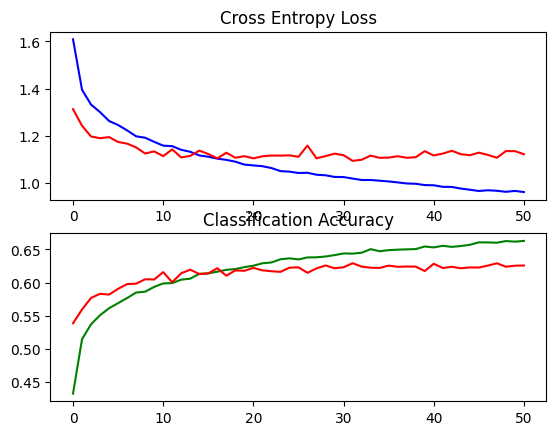

313/313 [==============================] - 1s 2ms/step


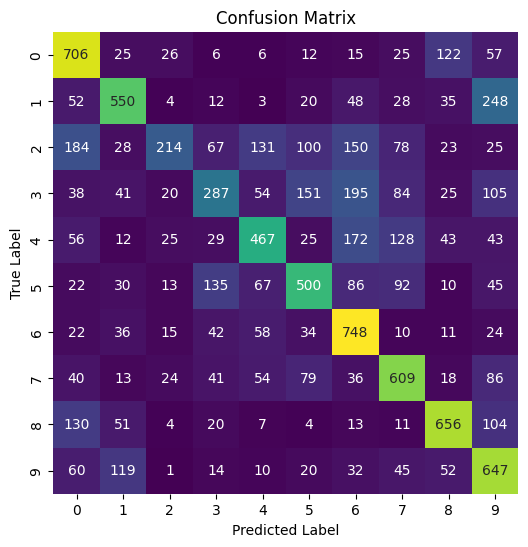

In [46]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)

In [45]:
# from keras.backend import clear_session
# clear_session()